In [1]:
import pandas as pd

In [2]:
# Loading the dataset
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')

In [3]:
# Displaying first few rows to understand the data
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
# Drop rows with missing values in critical columns
data = data.dropna(subset=['ADDRESSLINE2', 'STATE', 'TERRITORY'], how='any')

# Impute missing values for numerical columns (e.g., POSTALCODE)
data['POSTALCODE'] = data['POSTALCODE'].fillna(data['POSTALCODE'].median())

# Impute missing categorical columns (e.g., ADDRESSLINE2, STATE)
data['ADDRESSLINE2'] = data['ADDRESSLINE2'].fillna('Unknown')
data['STATE'] = data['STATE'].fillna(data['STATE'].mode()[0])
data['TERRITORY'] = data['TERRITORY'].fillna(data['TERRITORY'].mode()[0])

# Drop columns with too many missing values if not critical
data = data.drop(columns=['ADDRESSLINE2', 'TERRITORY'])

# Final check for missing values
print(f"Missing values after cleaning:\n{data.isnull().sum()}")


Missing values after cleaning:
ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


In [5]:
# Drop rows with missing values
data.dropna(inplace=True)

# Convert date columns to DateTime format (if applicable)
if 'ORDERDATE' in data.columns:
    data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
    
# Creating 'Year' and 'Month' columns for better time-based analysis
if 'ORDERDATE' in data.columns:
    data['Year'] = data['ORDERDATE'].dt.year
    data['Month'] = data['ORDERDATE'].dt.month


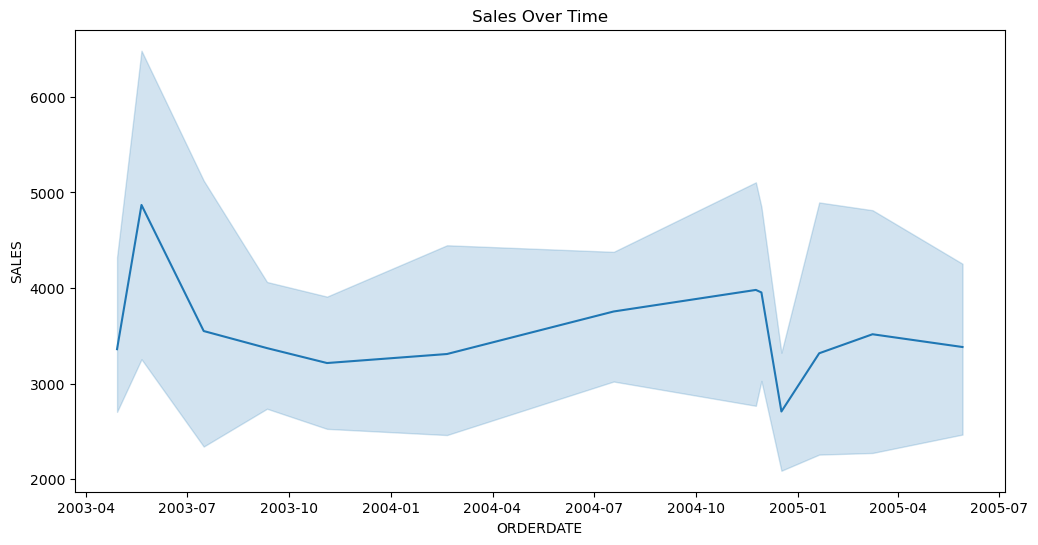

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales over time
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='ORDERDATE', y='SALES')
plt.title("Sales Over Time")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13764\444903386.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='ORDERDATE', y='SALES', ci=None)


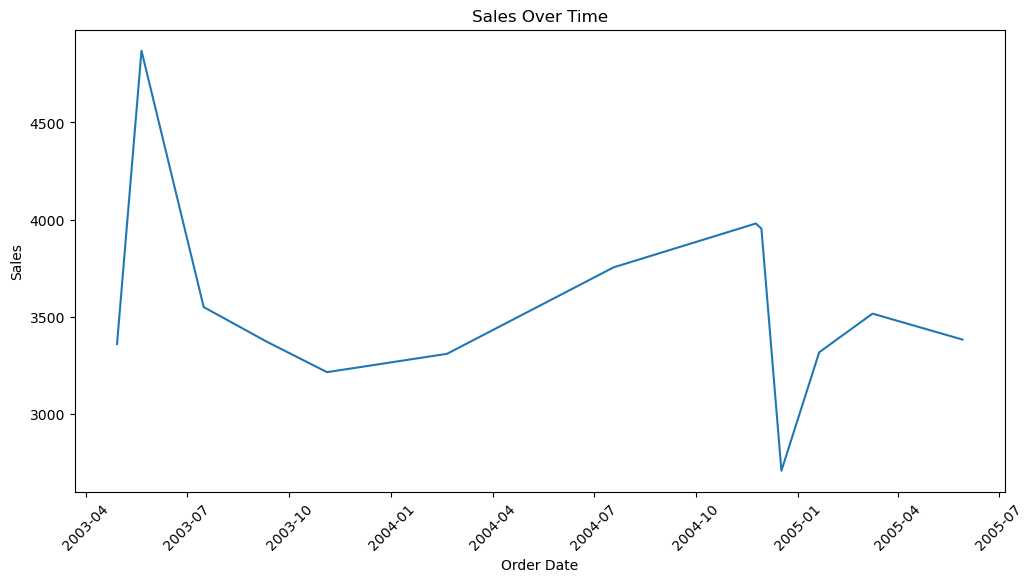

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='ORDERDATE', y='SALES', ci=None)
plt.title("Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13764\1588128684.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='PRODUCTLINE', y='SALES', estimator=sum, ci=None)


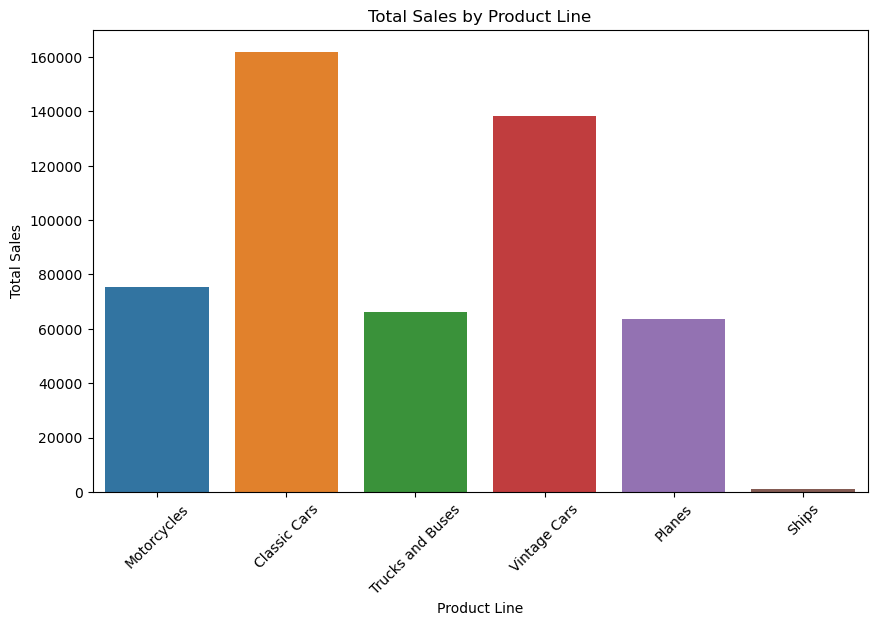

In [8]:
# Check if 'PRODUCTLINE' column exists
if 'PRODUCTLINE' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='PRODUCTLINE', y='SALES', estimator=sum, ci=None)
    plt.title("Total Sales by Product Line")
    plt.xlabel("Product Line")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13764\705288863.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='COUNTRY', y='SALES', estimator=sum, ci=None)


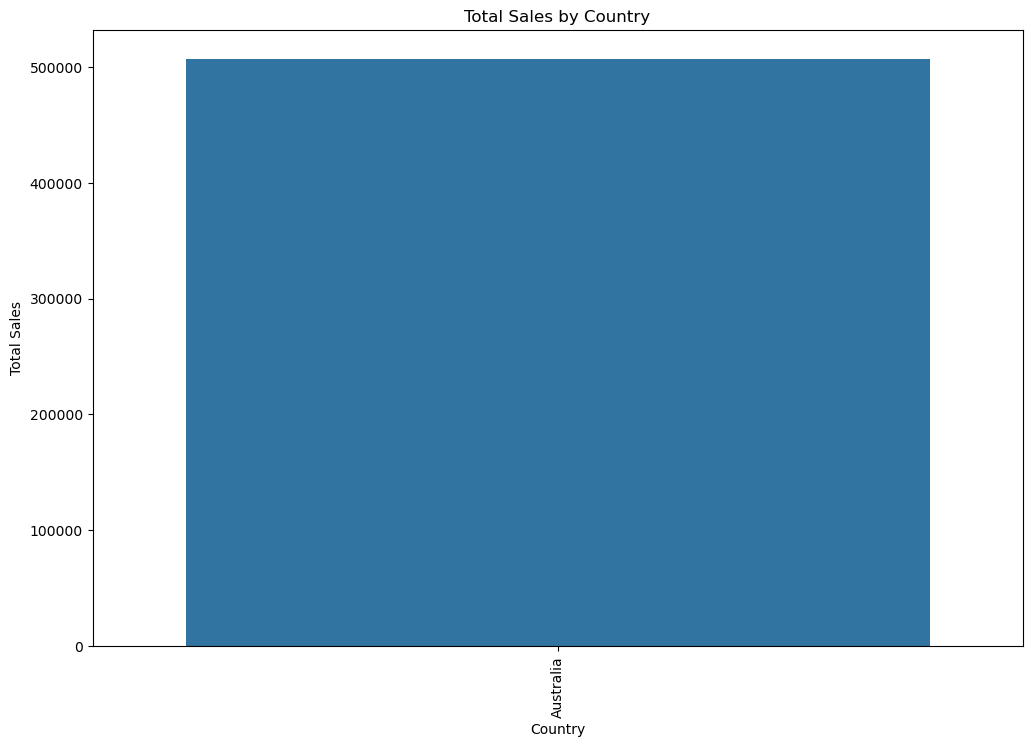

In [9]:
# Check if 'COUNTRY' column exists
if 'COUNTRY' in data.columns:
    plt.figure(figsize=(12, 8))
    sns.barplot(data=data, x='COUNTRY', y='SALES', estimator=sum, ci=None)
    plt.title("Total Sales by Country")
    plt.xlabel("Country")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=90)
    plt.show()


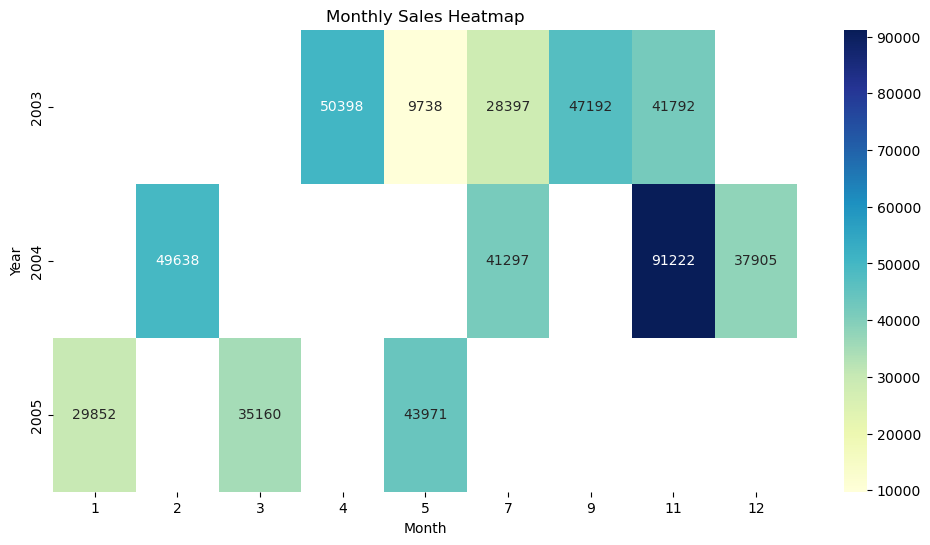

In [10]:
# Create pivot table for heatmap
if 'Year' in data.columns and 'Month' in data.columns:
    monthly_sales = data.pivot_table(values='SALES', index='Year', columns='Month', aggfunc='sum')
    plt.figure(figsize=(12, 6))
    sns.heatmap(monthly_sales, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Monthly Sales Heatmap")
    plt.xlabel("Month")
    plt.ylabel("Year")
    plt.show()


Mean Squared Error: 3964379.374868565
R-squared Score: -0.012194258221940535


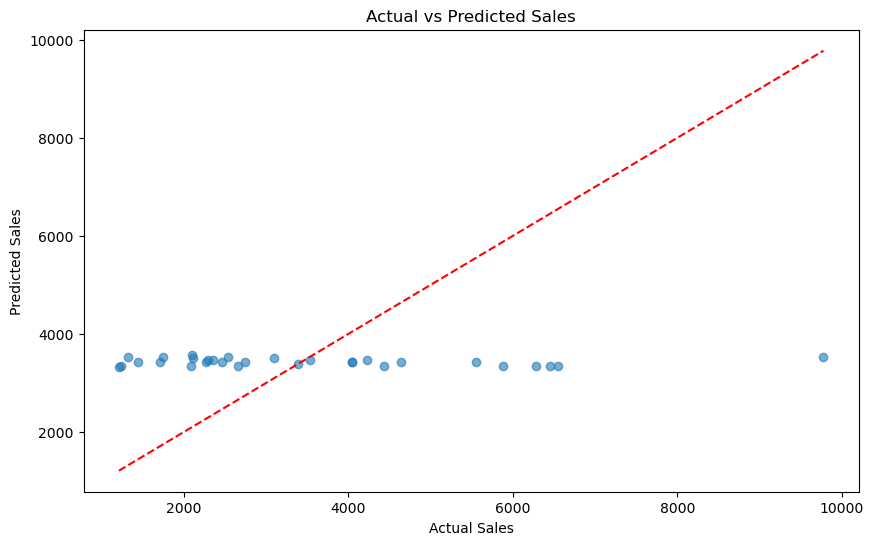

In [14]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Prepare data (replace 'Year' and 'Month' with columns from your dataset as needed)
X = data[['Year', 'Month']]  # Ensure 'Year' and 'Month' columns are in the dataset
y = data['SALES']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
predictions = model.predict(X_test)

# Step 6: Calculate Mean Squared Error and R-squared Score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Step 7: Visualize Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect predictions
plt.show()
